In [7]:
import sys

import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from IPython.display import HTML

import thicket as th
from thicket.model_extrap import Modeling

display(HTML("<style>.container { width:80% !important; }</style>"))

#data = "../data/mpi_scaling_cali"
data = "../../data/LULESH/weak"
t_ens = th.Thicket.from_caliperreader(data)

In [8]:
t_ens.metadata["jobsize"]

profile
158893881     125
457237855     125
866233908     216
895601074     216
1072952246      8
1144056209      8
1511579125     27
1567503180     64
1608643386    125
1991978503     64
2122722305     64
2133080948    216
2398583777      8
2459938057      8
2878534470    216
3045596727    125
3076046904    216
3144882782     27
3318255689     27
3355817352     27
3420551268     64
3568426806      8
3657204158     27
3691689928    125
4093506299     64
Name: jobsize, dtype: int64

In [9]:
mdl = Modeling(
    t_ens,
    "jobsize",
    chosen_metrics=[
        "Avg time/rank",
        "Total time",
    ],
)

mdl.produce_models()

self.param_name: jobsize
coordinates: [Coordinate(125.0,), Coordinate(216.0,), Coordinate(8.0,), Coordinate(27.0,), Coordinate(64.0,)]
len coordinates: 5
Callpaths: [Callpath(main), Callpath(CommRecv), Callpath(CommSBN), Callpath(CommSend), Callpath(lulesh.cycle), Callpath(LagrangeLeapFrog), Callpath(CalcTimeConstraintsForElems), Callpath(LagrangeElements), Callpath(ApplyMaterialPropertiesForElems), Callpath(EvalEOSForElems), Callpath(CalcEnergyForElems), Callpath(CalcLagrangeElements), Callpath(CalcKinematicsForElems), Callpath(CalcQForElems), Callpath(CalcMonotonicQForElems), Callpath(CommMonoQ), Callpath(LagrangeNodal), Callpath(CalcForceForNodes), Callpath(CalcVolumeForceForElems), Callpath(CalcHourglassControlForElems), Callpath(CalcFBHourglassForceForElems), Callpath(IntegrateStressForElems), Callpath(CommSyncPosVel), Callpath(TimeIncrement)]
Metrics: [Metric(Avg time/rank), Metric(Total time)]
DEBUG: (125.0,) main Avg time/rank [225.599423, 225.552587, 239.08892, 227.85903, 227.

In [10]:
t_ens.statsframe.dataframe

,name,Avg time/rank_extrap-model,Avg time/rank_RSS_extrap-model,Avg time/rank_rRSS_extrap-model,Avg time/rank_SMAPE_extrap-model,Avg time/rank_AR2_extrap-model,Avg time/rank_RE_extrap-model,Total time_extrap-model,Total time_RSS_extrap-model,Total time_rRSS_extrap-model,Total time_SMAPE_extrap-model,Total time_AR2_extrap-model,Total time_RE_extrap-model
node,,,,,,,,,,,,,
"{'name': 'main', 'type': 'function'}",main,-166.01523188280365 + 120.80707586160497 * p^(...,1150.614661,0.787180,21.520160,0.963879,0.222617,-157.69245831562682 + 4.941068284727041 * p^(1...,1.272650e+07,0.082837,13.941079,0.993910,0.102928
"{'name': 'CommRecv', 'type': 'function'}",CommRecv,-0.017433070000000012 + 0.01049321000000001 * ...,0.000005,0.005292,3.752080,0.993388,0.029833,-0.004792809479127657 + 0.0009923223056522534 ...,3.093685e-02,0.572346,16.544763,0.999392,0.173335
"{'name': 'CommSBN', 'type': 'function'}",CommSBN,1.39526958,6.694275,9.065629,67.462448,1.000000,0.098957,78.45310964000001,7.040032e+03,232.376857,51.842637,1.000000,0.208379
"{'name': 'CommSend', 'type': 'function'}",CommSend,-0.07304581871133564 + 0.015322767965479513 * ...,9.178480,3.604870,65.032228,-0.297185,0.693400,-6.0097997895877 + 0.7801265516672419 * p^(5/4),1.581638e+05,55.240132,109.738430,0.295533,2.427633
"{'name': 'lulesh.cycle', 'type': 'function'}",lulesh.cycle,-166.02021448171774 + 120.80332339662645 * p^(...,1150.735273,0.787972,21.526439,0.963873,0.222713,-157.84063346596463 + 4.940743433154403 * p^(1...,1.272824e+07,0.083071,13.960347,0.993908,0.103055
"{'name': 'LagrangeLeapFrog', 'type': 'function'}",LagrangeLeapFrog,-117.12487771866901 + 47.01425775018993 * log2...,694.120465,0.095104,14.115731,0.970519,0.103379,54.26036438013916 + 4.261190194491044 * p^(1) ...,2.790597e+06,1.361787,24.420174,0.998204,0.277524
"{'name': 'CalcTimeConstraintsForElems', 'type': 'function'}",CalcTimeConstraintsForElems,-0.5256673222425136 + 0.4619654861541064 * p^(...,0.007128,0.084607,9.408051,0.984623,0.081354,1.6446847467325703 + 0.02057365655644044 * p^(...,2.242502e+01,1.278523,22.072679,0.999381,0.256724
"{'name': 'LagrangeElements', 'type': 'function'}",LagrangeElements,-39.89451840403016 + 16.34008567480784 * log2(...,82.493145,0.030572,9.604679,0.971013,0.075078,38.445573567514636 + 1.491512843425088 * p^(1)...,3.469333e+05,2.178793,27.740352,0.998177,0.342754
"{'name': 'ApplyMaterialPropertiesForElems', 'type': 'function'}",ApplyMaterialPropertiesForElems,-16.633935470629083 + 13.264311362619207 * p^(...,9.990044,0.075014,11.434017,0.973948,0.095292,14.725995749232332 + 1.1673144066649421 * p^(5...,7.698462e+04,0.595842,20.572402,0.997297,0.202949


,Avg time/rank_extrap-model,Total time_extrap-model
node,,
"{'name': 'main', 'type': 'function'}",,
"{'name': 'CommRecv', 'type': 'function'}",,
"{'name': 'CommSBN', 'type': 'function'}",,
"{'name': 'CommSend', 'type': 'function'}",,
"{'name': 'lulesh.cycle', 'type': 'function'}",,
"{'name': 'LagrangeLeapFrog', 'type': 'function'}",,
"{'name': 'CalcTimeConstraintsForElems', 'type': 'function'}",,
"{'name': 'LagrangeElements', 'type': 'function'}",,
"{'name': 'ApplyMaterialPropertiesForElems', 'type': 'function'}",,

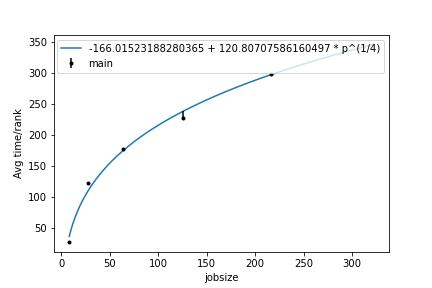
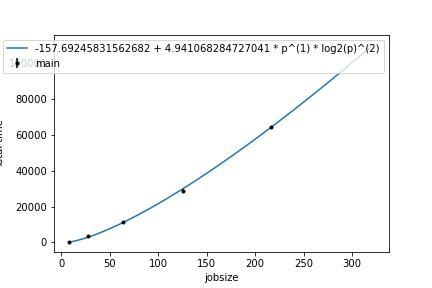
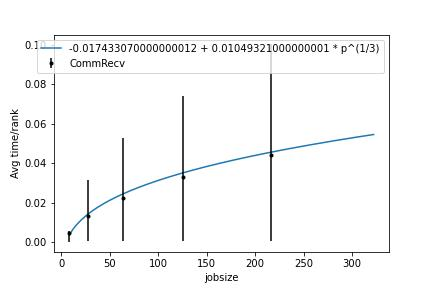
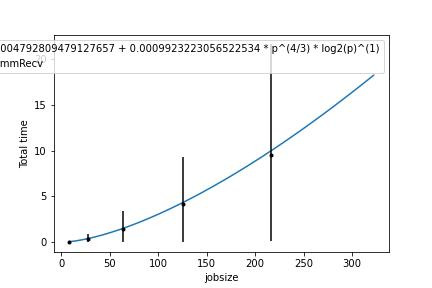
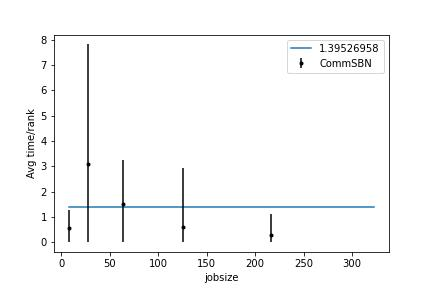
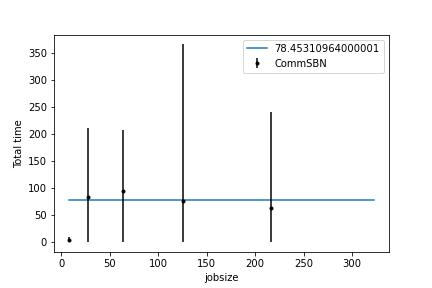
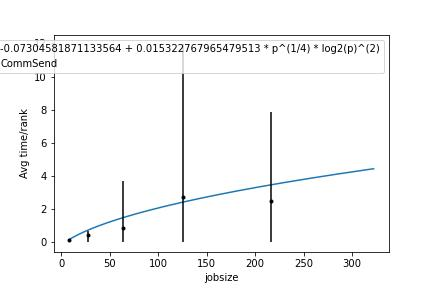
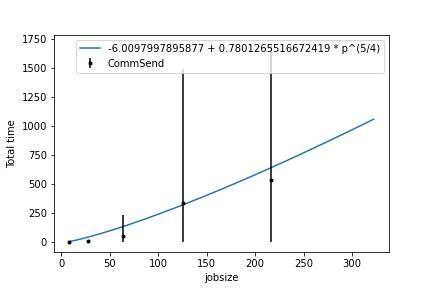
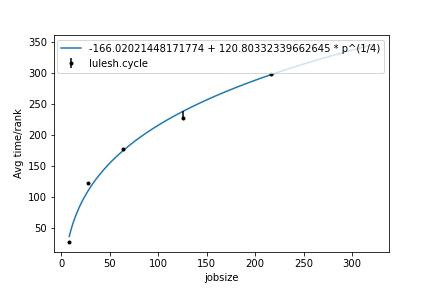
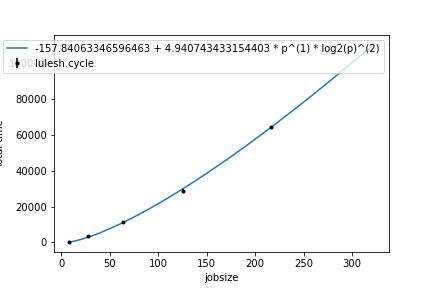
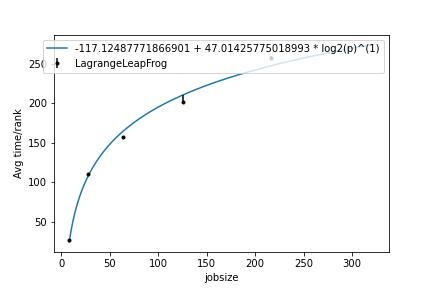
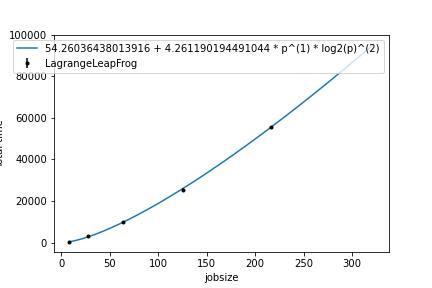
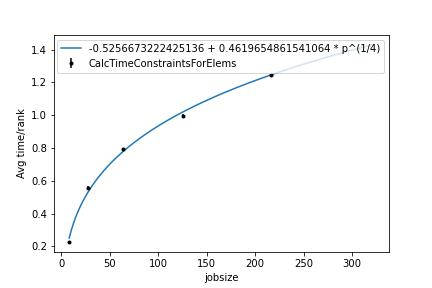
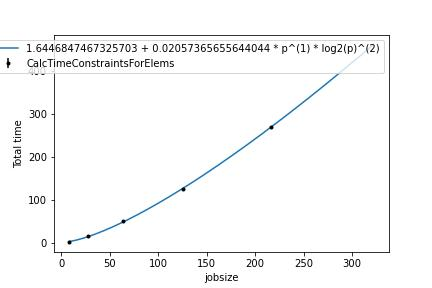
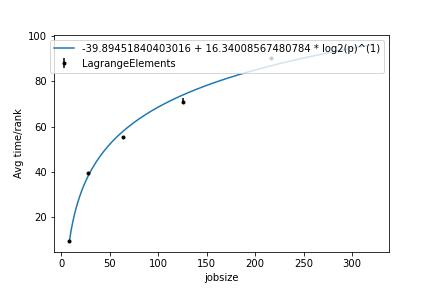
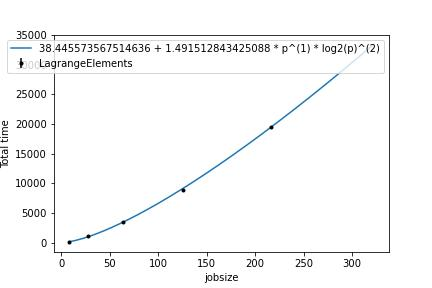
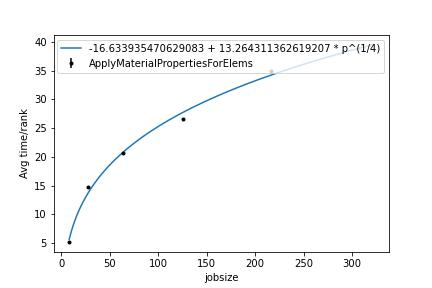
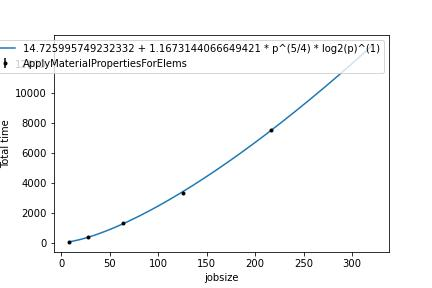
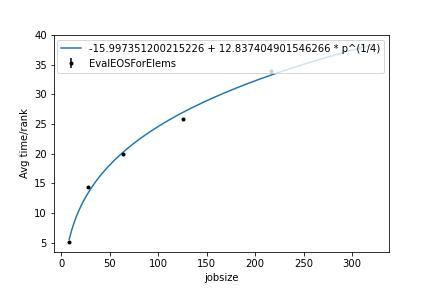
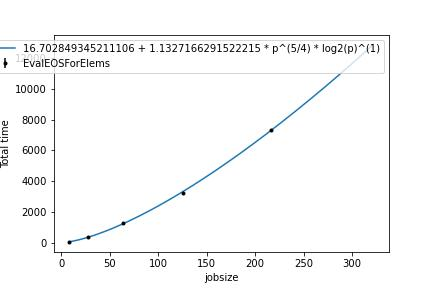
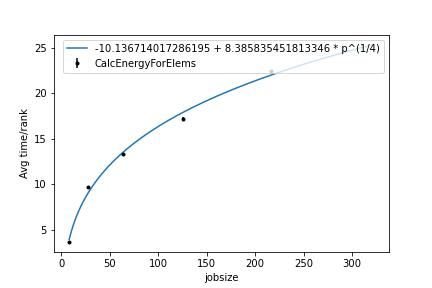
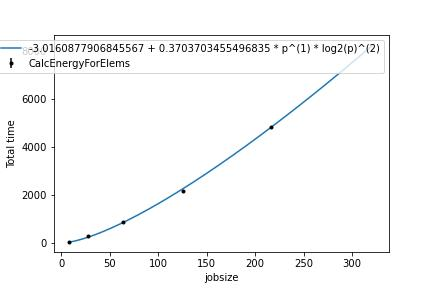
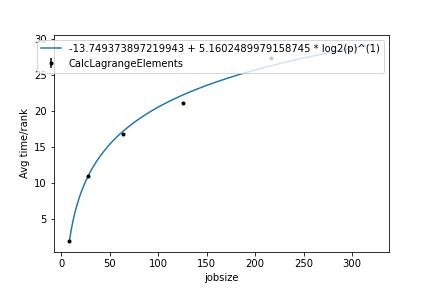
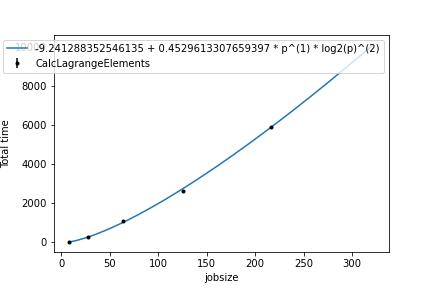
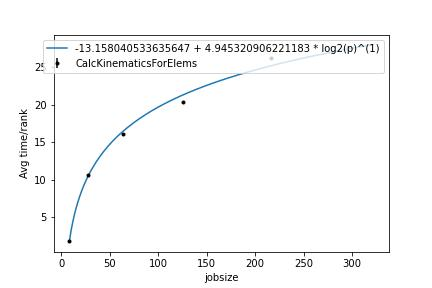
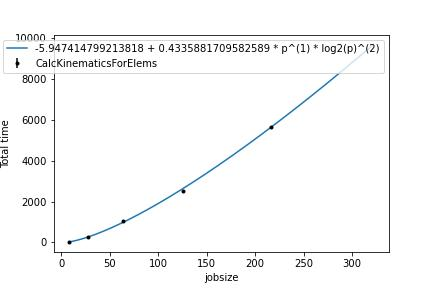
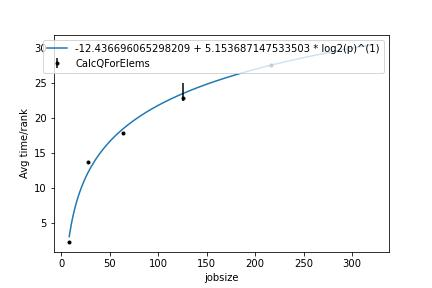
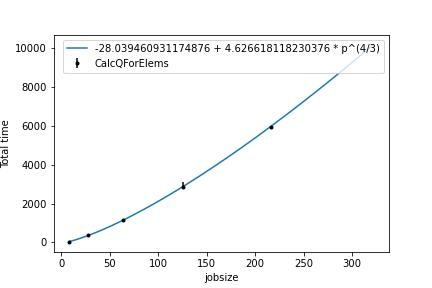
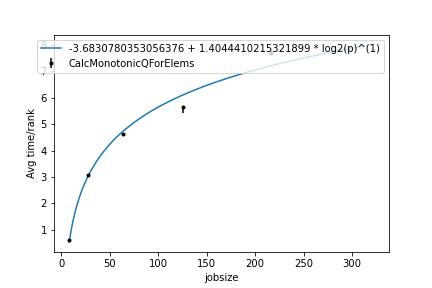
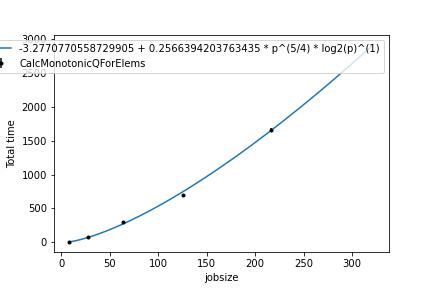
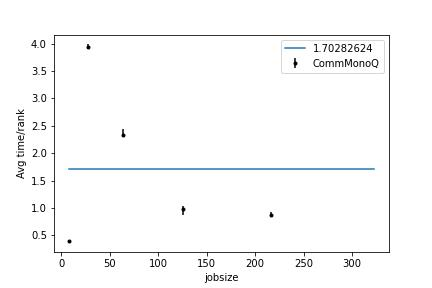
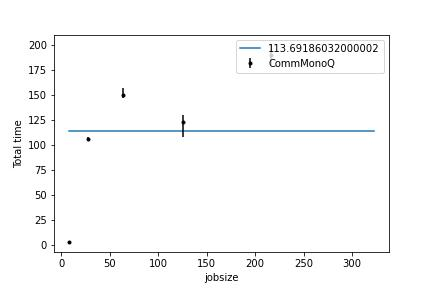
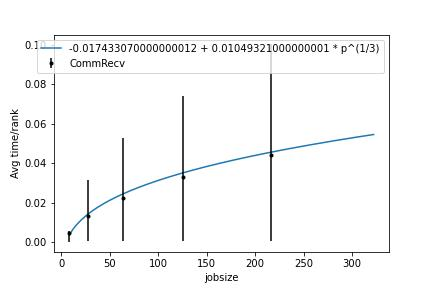
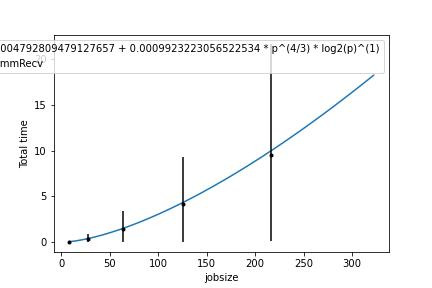
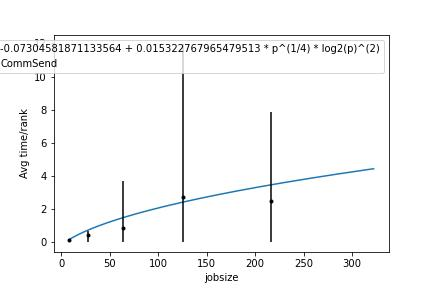
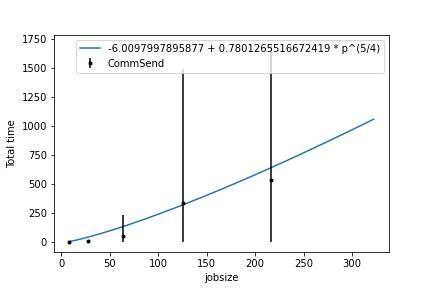
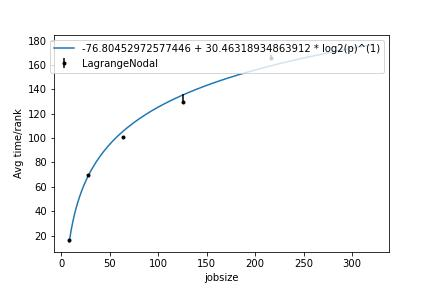
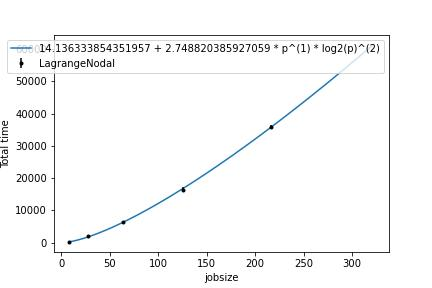
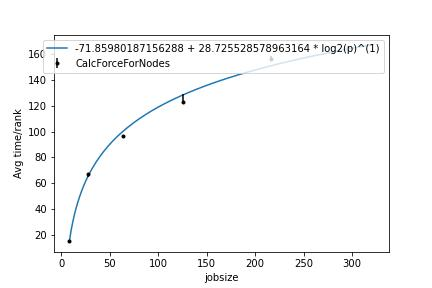
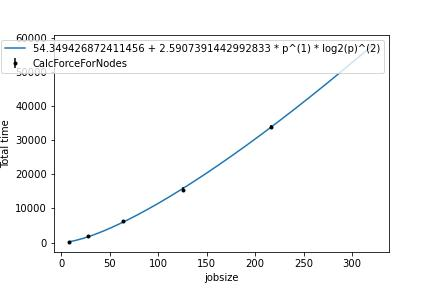
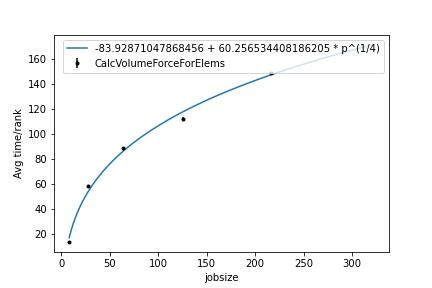
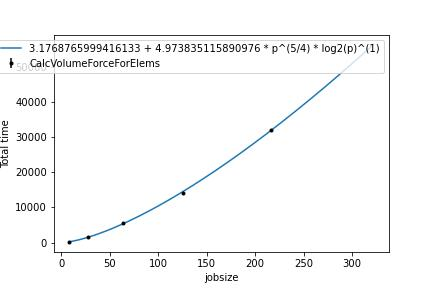
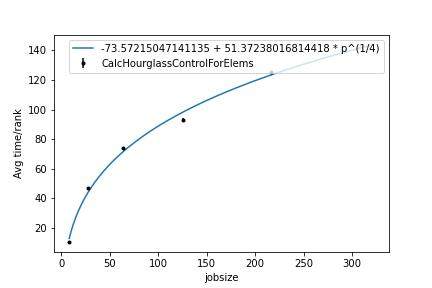
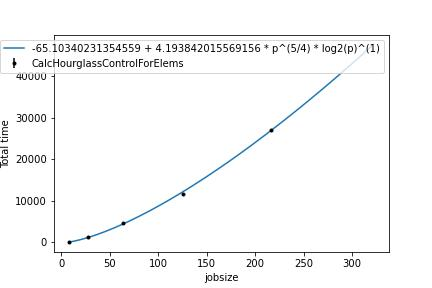
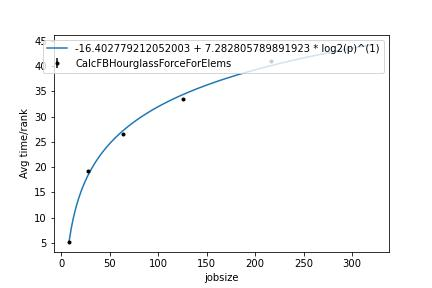
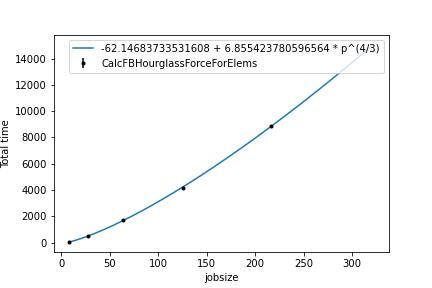
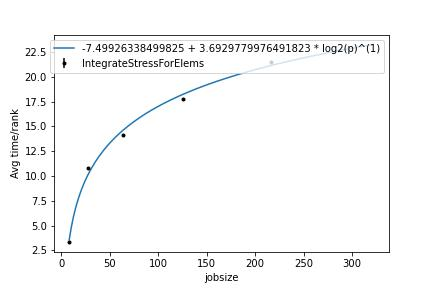
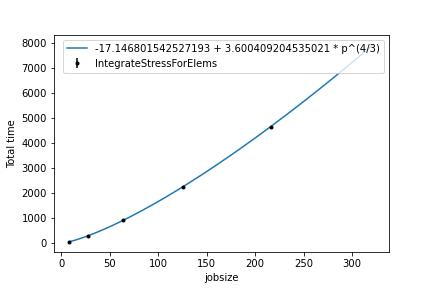
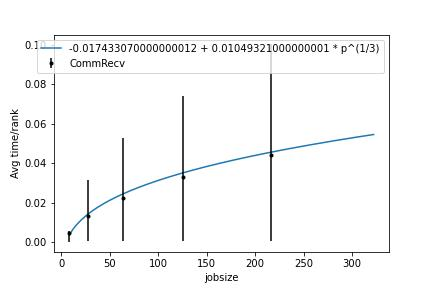
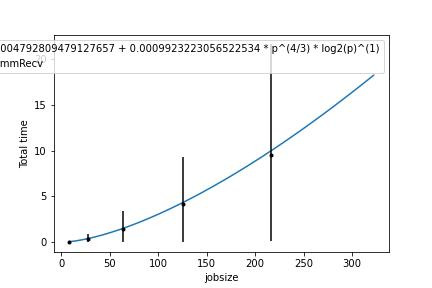
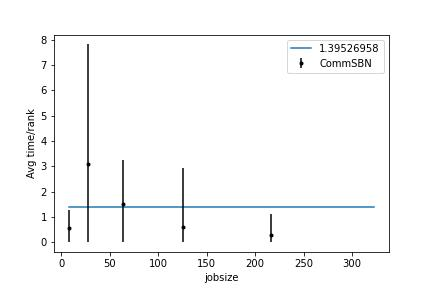
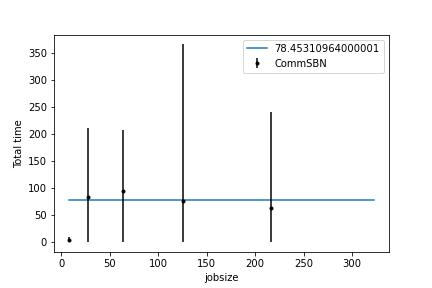
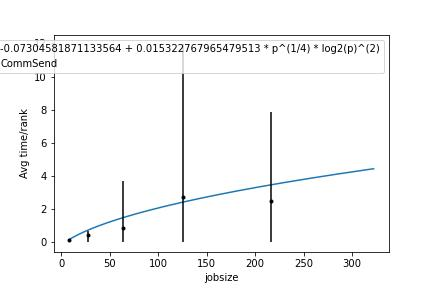
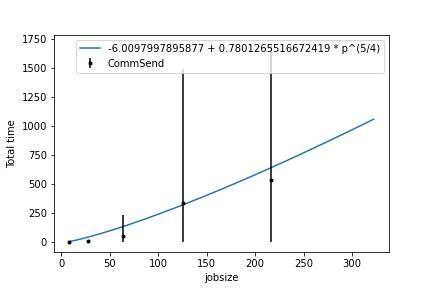
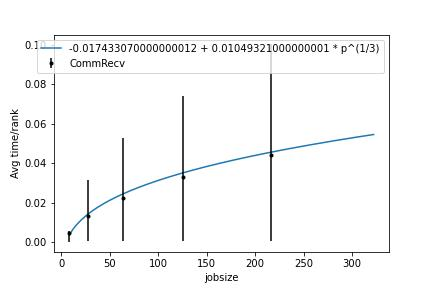
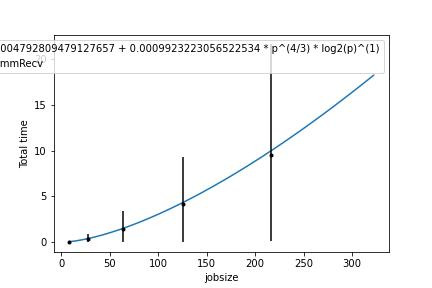
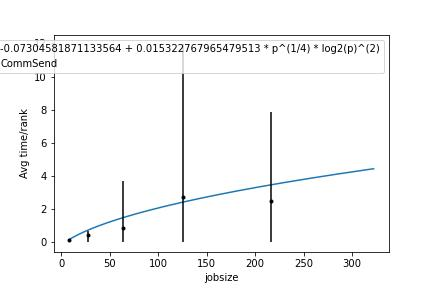
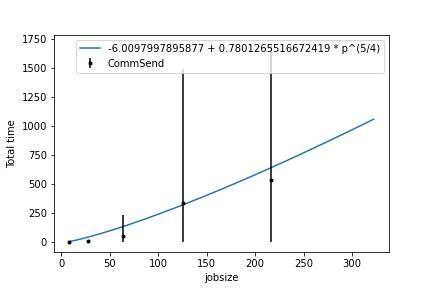
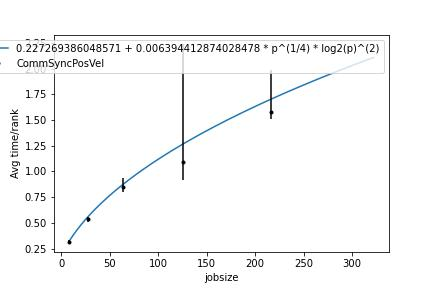
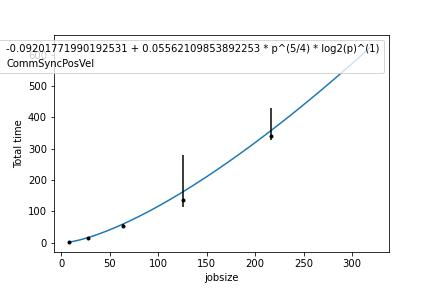
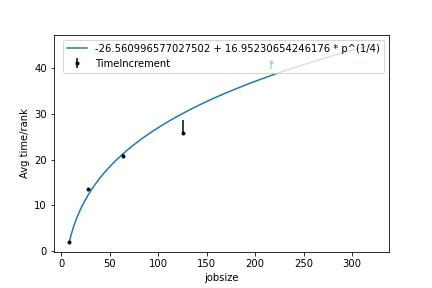
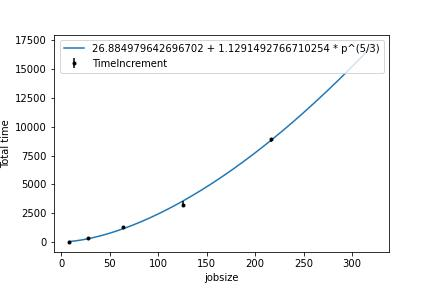

In [11]:
with pd.option_context("display.max_colwidth", 1):
    display(HTML(mdl.to_html()))

In [14]:
model_obj = t_ens.statsframe.dataframe.at[t_ens.statsframe.dataframe.index[29], "Total time_extrap-model"]

len(t_ens.statsframe.dataframe)

31

<Figure size 432x288 with 0 Axes>

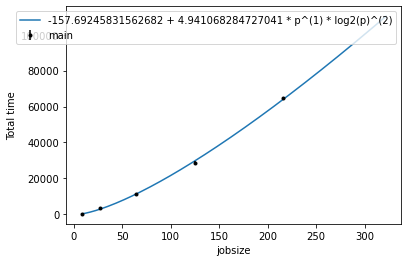

In [13]:
plt.clf()
fig, ax = model_obj.display(RSS=False)
#fig, ax = model_obj2.display(RSS=True)
plt.show()
plt.close()